In [1]:
import numpy as np
import pandas as pd
from rdkit.Chem import AllChem
import matplotlib.pyplot as plt
import seaborn as sns

### Protein Analysis

In [2]:
swissprot = pd.read_csv('../processed_data/protein2EC.csv')
swissprot

,Entry,Entry Name,Sequence,EC number,Length,clusterRes50,clusterRes30
0,A0A009IHW8,ABTIR_ACIB9,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...,3.2.2.6,269,A0A009IHW8,A1AY86
1,A0A024SC78,CUTI1_HYPJR,MRSLAILTTLLAGHAFAYPKPAPQSVNRRDWPSINEFLSELAKVMP...,3.1.1.74,248,A0A024SC78,A0A024SC78
2,A0A024SH76,GUX2_HYPJR,MIVGILTTLATLATLAASVPLEERQACSSVWGQCGGQNWSGPTCCA...,3.2.1.91,471,G4MM92,G4MM92
3,A0A059TC02,CCR1_PETHY,MRSVSGQVVCVTGAGGFIASWLVKILLEKGYTVRGTVRNPDDPKNG...,1.2.1.44,333,Q9S9N9,P14721
4,A0A068J840,UGT1_PANGI,MKSELIFLPAPAIGHLVGMVEMAKLFISRHENLSVTVLIAKFYMDT...,2.4.1.363,475,Q2V6K0,Q40287
...,...,...,...,...,...,...,...
149783,P36352,POLR_PHMV,VIVGTPPISPNWPAIKDLLHLKFKTEITSSPLFCGYYLSPAGCIRN...,2.7.7.48,178,P36352,P36352
149784,P39262,VG56_BPT4,MAHFNECAHLIEGVDKAQNEYWDILGDEKDPLQVMLDMQRFLQIRL...,3.6.1.12,171,Q94MV8,Q94MV8
149785,Q05115,AMDA_BORBO,MQQASTPTIGMIVPPAAGLVPADGARLYPDLPFIASGLGLGSVTPE...,4.1.1.76,240,Q05115,Q05115
149786,Q94MV8,VG56_BPLZ5,MAHFNECAHLIEGVDKANRAYAENIMHNIDPLQVMLDMQRHLQIRL...,3.6.1.12,172,Q94MV8,Q94MV8


In [3]:
swissprot['Sequence'].nunique()

141678

In [4]:
swissprot['EC number'].nunique()

4146

### Reaction Analysis

In [5]:
reaction2EC = pd.read_csv('/disk1/jyang4/repos/CARE/processed_data/reaction2EC.csv')
reaction2EC

,Reaction,EC number,Reaction Text
0,CC=O.NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O...,1.1.1.1,acetaldehyde + NADH + H+ = ethanol + NAD+ {r}
1,CC(C)(C)OC(=O)N1CCC(=O)C1.NC(=O)C1=CN([C@@H]2O...,1.1.1.1,N-tert-butoxycarbonyl-3-pyrrolidinone + NADH +...
2,CC(C)(C)OC(=O)N1CC[C@H](O)C1.NC(=O)c1ccc[n+]([...,1.1.1.1,N-tert-butoxycarbonyl-3-pyrrolidinone + NADH +...
3,NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)O...,1.1.1.1,p-nitrobenzyloxycarbonyl-3-pyrrolidinone + NAD...
4,NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)(O)OP(=O)...,1.1.1.1,p-nitrobenzyloxycarbonyl-3-pyrrolidinone + NAD...
...,...,...,...
53589,CC1=C2[N+]3=C(C=C4[N+]5=C(C(C)=C6N7[C@@H]8[C@H...,7.6.2.8,NaN
53590,CC1=C2[N+]3=C(C=C4[N+]5=C(C(C)=C6N7[C@H]([C@H]...,7.6.2.8,NaN
53591,C[N+]1(C)CCC[C@H]1C(=O)[O-].Nc1ncnc2c1ncn2[C@@...,7.6.2.9,NaN
53592,Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)OP(=O)(O...,7.6.2.9,NaN


In [6]:
reaction2EC['Reaction'].nunique()

42299

In [7]:
reaction2EC['EC number'].nunique()

4146

Text(0.5, 0, 'Number of reactions')

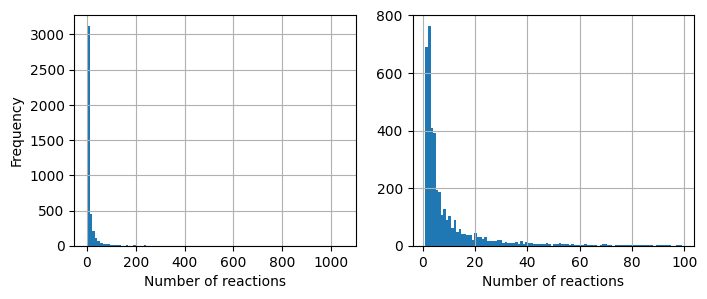

In [8]:
plt.figure(figsize=(8, 3))
plt.subplot(1,2, 1)
reaction2EC['EC number'].value_counts().hist(bins = 100)
plt.xlabel('Number of reactions')
plt.ylabel('Frequency')
#plt.legend(['ECreact', 'EnzymeMap'])

plt.subplot(1,2, 2)
subset = reaction2EC[reaction2EC['EC number'].map(reaction2EC['EC number'].value_counts()) < 100]
subset['EC number'].value_counts().hist(bins = 100)
plt.xlabel('Number of reactions')
#plt.legend(['ECreact', 'EnzymeMap'])

### Visualize a few reactions for tryptophane synthase

In [9]:
TrpB = reaction2EC[reaction2EC['EC number'] == '4.2.1.20']
TrpB.head()

,Reaction,EC number,Reaction Text
48889,Fc1cccc2cc[nH]c12.N[C@@H](CO)C(=O)O>>N[C@@H](C...,4.2.1.20,L-serine + 7-fluoroindole = 7-fluorotryptophan...
48890,C[C@@H](O)[C@H](N)C(=O)O.Cc1cc2ccccc2[nH]1>>Cc...,4.2.1.20,"L-threonine + 2-methylindole = 2-methyl-(2S,3S..."
48891,N[C@@H](COP(=O)(O)O)C(=O)O.c1ccc2[nH]ccc2c1>>N...,4.2.1.20,O-phospho-L-serine + indole = L-tryptophan + p...
48892,Fc1ccc2[nH]ccc2c1.N[C@@H](CO)C(=O)O>>N[C@@H](C...,4.2.1.20,L-serine + 5-fluoroindole = 5-fluorotryptophan...
48893,N#Cc1ccc2[nH]ccc2c1.N[C@@H](CO)C(=O)O>>N#Cc1cc...,4.2.1.20,L-serine + 5-cyanoindole = 5-cyano-L-tryptopha...


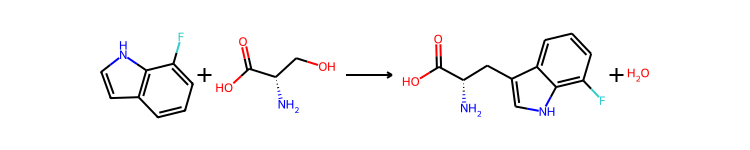

In [10]:
AllChem.ReactionFromSmarts(TrpB['Reaction'].values[0], useSmiles=True)

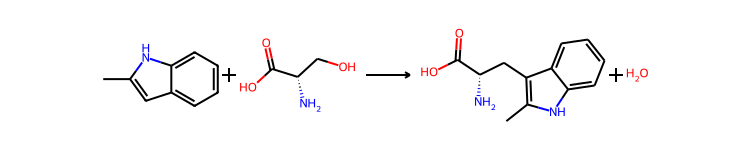

In [11]:
AllChem.ReactionFromSmarts(TrpB['Reaction'].values[52], useSmiles=True)

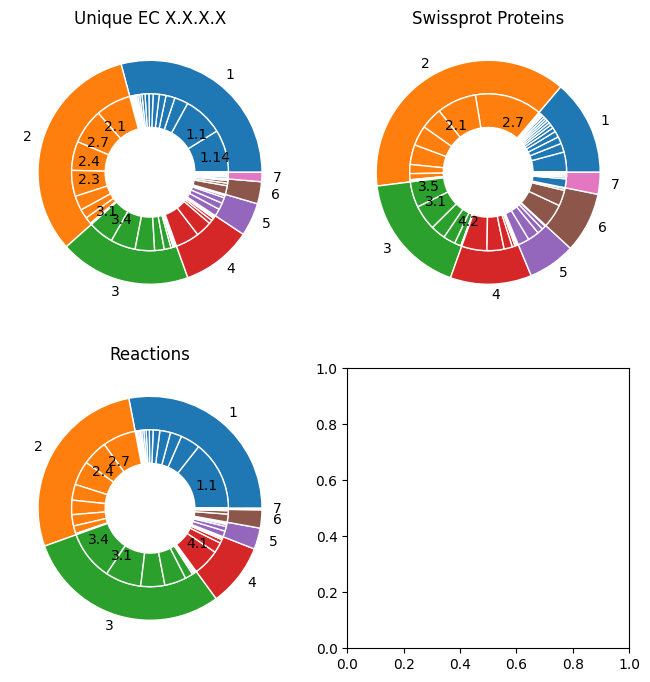

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

for index, title in enumerate(['Unique EC X.X.X.X', 'Swissprot Proteins', 'Reactions']):

    df = pd.DataFrame()
    
    if index == 0:
        df['EC'] = swissprot['EC number'].unique()
    elif index == 1:
        df['EC'] = swissprot['EC number']
    elif index == 2:
        df['EC'] = reaction2EC['EC number']

    
    df['EC1'] = df['EC'].str.split('.').str[0]
    df['EC2'] = df['EC'].str.split('.').str[:2].str.join('.')

    distribution = [list(df[df['EC1'] == ec]['EC2'].value_counts().values) for ec in np.sort(df['EC1'].unique())]
    level2_labels = [list(df[df['EC1'] == ec]['EC2'].value_counts().keys()) for ec in np.sort(df['EC1'].unique())]

    #concatenate zeros so that each list is the same length
    max_len = max([len(l) for l in distribution])
    for i, l in enumerate(distribution):
        distribution[i] = l + [0] * (max_len - len(l))
        level2_labels[i] = level2_labels[i] + [''] * (max_len - len(level2_labels[i]))
    #distribution

    sum = np.sum(np.sum(distribution))
    #replace level2 labels with an empty string if the corresponding entry in distribution is too small
    for i, l in enumerate(distribution):
        for j, count in enumerate(l):
            if count/sum < 0.05:
                level2_labels[i][j] = ''


    size = 0.3
    #vals = np.array([[1000., 32.], [37., 40.], [29., 10.]])
    vals = np.array(distribution)
    i = index // 2
    j = index % 2

    cmap = plt.colormaps["tab10"]
    #outer_colors = cmap(np.arange(vals.shape[0])*3.7)
    #inner_colors = cmap(np.arange(vals.shape[0]*vals.shape[1]))

    mylabels = np.arange(1, vals.shape[0]+1)

    outer_colors = sns.color_palette("tab10", vals.shape[0])
    axs[i, j].pie(vals.sum(axis=1), radius=1, colors=outer_colors,
        wedgeprops=dict(width=size, edgecolor='w'), labels=mylabels)
    #repeat the outer colors as the inner colors
    inner_colors = []
    for k in range(6):
        inner_colors = inner_colors + [outer_colors[k]] * vals.shape[1]


    axs[i, j].pie(vals.flatten(), radius=1-size, colors=inner_colors,
        wedgeprops=dict(width=size, edgecolor='w'), labels=np.array(level2_labels).flatten(), labeldistance=0.65, )

    axs[i, j].set(aspect="equal", title=title)
plt.show()